### Employee Exit Surveys (DETE & TAFE Institute in Queensland, Australia)

This project is contains dataset collect froman employee exit survey fron guided project, employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.The aim of this project is to clean and analyze this dataset. Both emmployee exit survey will be combined and analyzed together to answer the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
- What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [1]:
# Read import necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set better dpi displays on larger screen resolutions
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Tahoma'

dete_survey = pd.read_csv('dete_survey.csv') # Read the dete_survey csv file

tafe_survey = pd.read_csv('tafe_survey.csv') # Read the tafe_survey csv file

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
print(dete_survey[['SeparationType']].value_counts())
print(dete_survey[['Age']].value_counts())
print(dete_survey[['Position']].value_counts())

SeparationType                      
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
dtype: int64
Age          
61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
dtype: int64
Position                                               
Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of C

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey['Institute'].value_counts()

Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
The Bremer Institute of TAFE               1
Metropolitan South Institute of TAFE       1
Name: Institute, dtype: int64

In [9]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

### Findings From The Department of Education, Training and Employment (DETE) Survey

- The DETE employee exit survey reveals that most departures were due to age retirement and various forms of resignation, with the workforce largely composed of older employees, particularly those aged 56 and above. Teaching roles dominated the data, and common reasons for leaving included job dissatisfaction, interpersonal conflicts, and lack of recognition. Several data fields, especially around diversity and classification, were incomplete. To address these findings, DETE should focus on improving retention through better workplace support, succession planning for an aging workforce, and more consistent data collection—particularly in diversity and employee feedback areas.

### Findings From The Technical and Further Education (TAFE) Survey

- The dataset contains 702 employee exit records from various TAFE institute, with 72 columns covering demographics, reasons for leaving, contributing factors, workplace views, and induction experiences. Key fields include cessation year, reason for leaving, and satisfaction ratings. Some columns have significant missing data, especially in contributing factors and demographic sections. Most records come from a few major institutes. The next steps could involve cleaning the data, analyzing exit reasons, comparing institute satisfaction, or visualizing trends, depending on the analysis goals.Unlike the DETE survey, the data collection from the TAFE suvey was not standardized, hence, most of the column variables have different names and this most likely contributes to the majority of the missing data.

## Identify Missing Values and Drop Unnecesary Columns
The dete_survey dataframe includes 'Not Stated' entries that represent missing values, but they aren't recorded as NaN. Both dete_survey and tafe_survey contain many columns unnecessary for analysis. While the dataframes share similar information, the column names differ. Several columns also indicate that an employee resigned due to dissatisfaction. 
To begin, the plan is to convert 'Not Stated' to NaN using pd.read_csv() and then remove columns that aren't needed for analysis.

In [10]:
# Drop missing columns from the dete survey dataset
dete_survey= pd.read_csv('dete_survey.csv', na_values= 'Not Stated')
# Drop missing columns in the dete_survey
dete_survey_updated= dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [11]:
# Drop missing columns in the tafe_survey
tafe_survey_updated= tafe_survey.drop(tafe_survey.columns[17:66], axis= 1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

The missing values in the dete_survey was updated from `'Not Stated' to NaN` while also dropping the columns not needed for the analysis, about 21 columns was dropped leaving the total number of 34 columns from the initial 55 columns. Also, about 48 columns were dropped from the the tafe_survey leaving the total number of coulmns to 22.

### Clean Column Names
Each dataframe contains many of the same columns, but the column names are different. Below are some columns selected for use in the final analysis: 


| dete_survey | tafe_survey | Definition |
| :-----: | :-----: | :-----: |
| ID | Record ID | An id used to identify the participant of the survey |
| SeparationType | Reason for ceasing employment | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| DETE Start Date |  | The year the participant began employment with the DETE |
|  | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years) (in years) | 
| Age | CurrentAge. Current Age | The age of the participant |
| Gender | Gender	Gender. What is your Gender? | The gender of the participant |

Since the goal is to combine the two datasets, it's necessary to standardize column names using the DataFrame.columns attribute.

In [12]:
# Rename columns in dete_survey
dete_survey_updated.columns= dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [13]:
# Rename columns in tafe_survey
tafe_survey_updated= tafe_survey_updated.rename (columns= {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Column Name Standardization

To prepare the `dete_survey` and `tafe_survey` dataframes for analysis, column names were standardized:

- **In `dete_survey`:**  
  All column names were converted to lowercase, trailing whitespace was removed, and spaces were replaced with underscores. These steps improve naming consistency and simplify column referencing in code.

- **In `tafe_survey`:**  
  A custom mapping was used to rename selected columns to align with the naming format used in `dete_survey`. For example, `'Record ID'` became `'id'`, `'CESSATION YEAR'` became `'cease_date'`, among others. The updated names follow a consistent and readable style.

Standardizing column names across both datasets makes data handling easier and allows for accurate comparison.

### Filter The Data

The project's end goal is to answer the question of employees resigning due to dissatisfaction at the institute. However, the separationtype column in the `dete_survey_updated` dataframe includes several entries that mention resignation, such as:
- Resignation due to other reasons
- Resignation to join another employer
- Resignation for relocation overseas or interstate

These indicate different resignation circumstances among survey respondents.

So, it is important to take account of these variations without dropping useful data.


In [14]:
# Count unique values in tafe_survey_updated

tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [15]:
# Count unique values in dete_survey_updated
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Since  the `dete_survey_updated` contains several entries that mention resignation, it is best to standardize to only carry `Resignation` so ensure all the values are counted without ommission.

In [16]:
# Get total count of resignation
dete_survey_updated['separationtype']= dete_survey_updated['separationtype'].str.replace('-',' ').str.split().str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation    311
Age            285
Voluntary       67
Ill             61
Other           49
Contract        34
Termination     15
Name: separationtype, dtype: int64

In [17]:
# Filter data for both dataframes by resignation

dete_resignations= dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations= tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

### Verify the Data
Before proceeding with further cleaning and analysis, it's important to check that the data is generally consistent. While not all errors can be detected, reviewing the data for obvious issues helps prevent completing an analysis that may be invalid due to poor data quality.

In this step, the focus is on ensuring that the values in the `cease_date` and `dete_start_date` columns appear reasonable. The `cease_date` represents the final year of employment, and the `dete_start_date` reflects the year employment began. It would be illogical for these dates to extend beyond the current year.

Additionally, considering that individuals in this profession typically begin their careers in their 20s, a `dete_start_date` earlier than 1940 would be highly unusual. A significant number of dates far outside a reasonable range could indicate serious problems with the dataset and may justify halting the analysis. However, if only a few outliers are present, it would be appropriate to remove them before continuing.

In [18]:
# Check years for inconsistencie and clean columns in each dataframe
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [19]:
dete_resignations['cease_date']= dete_resignations['cease_date'].astype(str).str.split('/').str[-1]
dete_resignations['cease_date']= dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [20]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1987.0     1
1975.0     1
1984.0     1
1971.0     1
1973.0     1
1972.0     1
1963.0     1
1977.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1985.0     3
2001.0     3
1986.0     3
1995.0     4
1988.0     4
1991.0     4
1989.0     4
1993.0     5
1980.0     5
1990.0     5
1997.0     5
2002.0     6
1998.0     6
1996.0     6
1992.0     6
2003.0     6
1994.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2007.0    21
2012.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [21]:
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

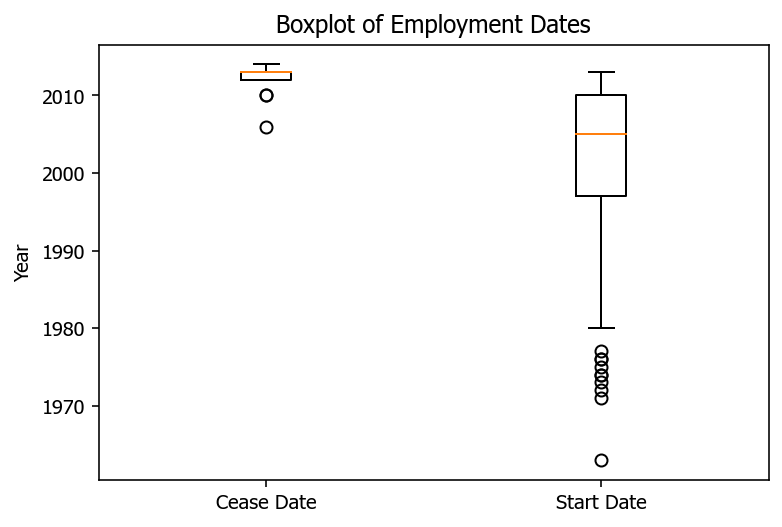

In [22]:
plt.boxplot([
    dete_resignations['cease_date'].dropna(),
    dete_resignations['dete_start_date'].dropna()
], labels=['Cease Date', 'Start Date'])

plt.title('Boxplot of Employment Dates')
plt.ylabel('Year')
plt.show()


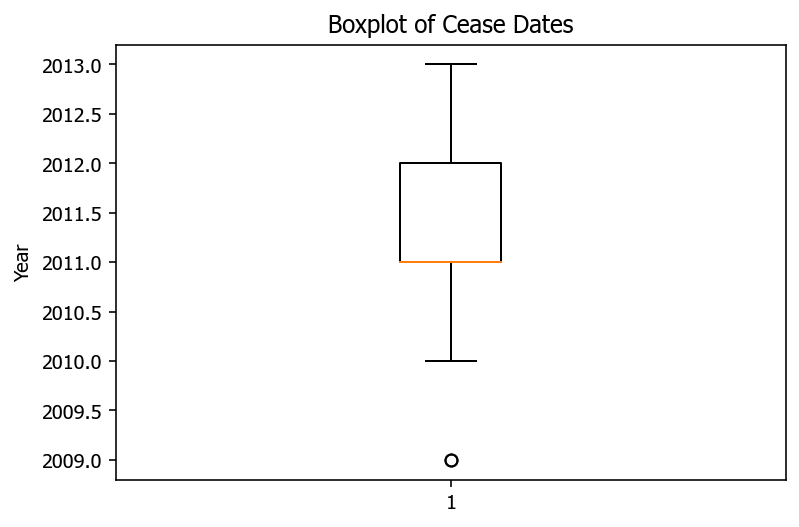

In [23]:
plt.boxplot(tafe_resignations['cease_date'].dropna())
plt.title('Boxplot of Cease Dates')
plt.ylabel('Year')
plt.show()

### Boxplot Analysis of Employment Dates
The boxplots highlight potential inconsistencies and outliers in the employment date columns: 
- In the first plot comparing `dete_start_date` and `cease_date`, the `dete_start_date` column shows a narrow range for most values, with a few clear outliers indicating unusually early start years. The `cease_date` column presents a broader distribution, along with several outliers below the lower whisker, suggesting possible data entry errors or atypical resignation years.

- The second plot, which likely represents calculated years of service, shows a more even distribution. However, an outlier on the lower end indicates an extremely short service period that may warrant further inspection. These visualizations support identifying and addressing anomalous values that could impact the reliability of further analysis.

- The DETE resignation data shows most resignations happened in 2012 and 2013, with 129 and 146 cases respectively, and minimal resignations in other years. In contrast, TAFE resignations are more evenly distributed, peaking in 2011 (116), followed by steady counts in 2012, 2010, and 2013. Since the aim of the project is not to analyze by year, this will be left at as it is.

### Create New Column
With the years in the `dete_resignations` dataframe verified, these values can now be used to create a new column. The objective is to explore whether employees with shorter tenures are resigning due to dissatisfaction, and how this compares to those with longer service periods. In human resources, this duration is commonly referred to as "years of service."

The `tafe_resignations` dataframe already includes a "service" column, previously renamed to `institute_service`. To enable a consistent analysis across both datasets, a corresponding `institute_service` column will be created in `dete_resignations`.

In [24]:
#Create a new column for length of service for the dete_resignations dataframe
dete_resignations['institute_service']= dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

### Explanation For Creating The New Column
A new column called `institute_service` was added to the `dete_resignations` DataFrame by calculating the difference between the `cease_date` and `dete_start_date` columns. This change quantifies the length of service at the institute for each record. Calculating this difference helps analyze the duration employees worked before resigning, which can be useful for identifying trends or patterns in employee tenure. The use of `.head()` at the end provides a quick preview of the first few values in the new column to verify that the calculation was performed correctly.

### Identify Dissatisfied Employees
Below are the columns used to categorize employees as "dissatisfied" from each dataframe.

`tafe_survey_updated:`

- Contributing Factors. Dissatisfaction

- Contributing Factors. Job Dissatisfaction

`dete_survey_updated:`

- job_dissatisfaction

- dissatisfaction_with_the_department

- physical_work_environment

- lack_of_recognition

- lack_of_job_security

- work_location

- employment_conditions

- work_life_balance

- workload

If any of the factors listed above caused an employee to resign, they will be marked as dissatisfied in a new column.

To create the new column, the following steps will be taken:

- Convert the values in the `'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction'` columns in the `tafe_resignations` dataframe to True, False, or NaN values.

- If any of the specified columns contain a True value, the new column named `dissatisfied` will be set to True. To achieve this, a function will be written that:

    - Returns True if any element in the selected columns is True

    - Returns False if none of the elements in the selected columns is True

    - Returns NaN if the value is missing

After these changes, the `dissatisfied` column will only contain the following values:

- True: indicates resignation due to job dissatisfaction

- False: indicates resignation for reasons other than job dissatisfaction

- NaN: indicates missing data

In [25]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [26]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
 
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1)
tafe_resignations_up = tafe_resignations.copy()

In [27]:
tafe_resignations_up['dissatisfied'].value_counts(dropna= False)

False    249
True      91
Name: dissatisfied, dtype: int64

In [28]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN

dete_resignations['dissatisfied']= dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(axis=1, skipna= False)
dete_resignations_up = dete_resignations.copy() 

In [29]:
dete_resignations_up['dissatisfied'].value_counts(dropna= False)

False    162
True     149
Name: dissatisfied, dtype: int64

### Explanation of Changes
A new column named `'dissatisfied'` was added to both the `dete_resignations` and `tafe_resignations` DataFrames to indicate whether an employee experienced any form of job dissatisfaction. In the `dete_resignations` DataFrame, this column was created by evaluating multiple relevant columns—such as `job_dissatisfaction, workload, and lack_of_recognition` using `.any(axis=1, skipna=False)` to return True if any of the selected values in a row indicated `dissatisfaction`. 

In the `tafe_resignations` DataFrame, two dissatisfaction-related columns were processed with a custom function to convert values to True, False, or NaN. The results were then combined using `.any(axis=1)` to produce a single Boolean outcome. These changes make it easier to identify dissatisfied employees and perform consistent analysis across both datasets.

### Combine The Data
The datasets are now ready to be combined. The final objective is to aggregate the data based on the institute_service column, so the combined data should be structured in a way that supports straightforward aggregation by this column.

In [30]:
# Create new column to differntiate both datasets
dete_resignations_up['institute']= 'DETE'
tafe_resignations_up['institute']= 'TAFE'

In [31]:
# Combine both dataframe
combined= pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [32]:
# Drop columns with less than 500 null 
combined_updated= combined.dropna(thresh = 500, axis=1).copy()
combined_updated.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          0
institute             0
dtype: int64

A new column named `institute` was added to both dataframes to indicate the source of each resignation entry. The value `"DETE"` was assigned to all rows in the `dete_resignations_up` dataframe, and `"TAFE"` to all rows in the `tafe_resignations_up` dataframe. This allows for easy identification of the data's origin after combining the two datasets into a single dataframe called `combined`. 
To ensure the dataset contains only columns with sufficient data, the `dropna()` method was used with the thresh parameter to remove any columns with fewer than 500 non-null values. The resulting dataframe, `combined_updated`, retains only the most complete columns for further analysis.

### Clean The Service Column
Before analysis can begin, the institute_service column needs to be cleaned and standardized. This column contains values in different formats, making it difficult to interpret. To make the data usable, the values will be converted into defined career stage categories based on length of service. These categories are:

- New: Less than 3 years at a company

- Experienced: 3–6 years

- Established: 7–10 years

- Veteran: 11 or more years

This classification is informed by the idea that employee needs are better understood through career stage rather than age based on this [article](https://www.businesswire.com/newsroom).

In [33]:
# Check unique values in the institute_service column
combined_updated['institute_service'].value_counts(dropna= False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [34]:
# Change institute_service column to str
combined_updated['institute_service_up']= combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')
combined_updated['institute_service_up']= combined_updated['institute_service_up'].astype(float)
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [35]:
# Create function to segment the carrer categories

def career_cat(val):
    if pd.isnull(val):
        return np.nan
    if val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'

# Apply the Series.apply() method

combined_updated['service_cat']= combined_updated['institute_service_up'].apply(career_cat)
combined_updated['service_cat'].head()

3     Established
5         Veteran
8     Experienced
9         Veteran
11    Experienced
Name: service_cat, dtype: object

To prepare the `institute_service` column for analysis, the values were first converted to string type using the `astype(str)` method. This ensured consistency in data formatting and enabled the use of vectorized string methods. A regular expression was applied to extract numerical values representing years of service from the strings. 
These extracted values were then converted to float type to allow for numerical comparisons. A custom function was created to categorize each year value into one of four career stages: `New, Experienced, Established, or Veteran`, based on predefined service length ranges. Missing values were handled using `pd.isnull()` to ensure accurate classification. The function was applied to the column using `apply()`, and the resulting career stage labels were stored in a new column named `service_cat`. This transformation supports more meaningful analysis by grouping employees according to career stage rather than raw service length.

### Perform Initial Analysis
The `dissatisfied` column contains Boolean values, where `True` indicates `dissatisfaction` and `False` indicates `satisfaction`. Since Boolean values are treated as integers in many pandas methods `(with True as 1 and False as 0)`, this allows for straightforward aggregation. For example, using methods like `pivot_table()`, it becomes possible to calculate totals, averages, or percentages of `dissatisfied` individuals within different groups. Before performing such analysis, missing values in the `dissatisfied` column will be addressed to ensure accuracy. This step serves as an introduction to the analysis process, with more comprehensive data cleaning to follow.

In [36]:
# Count unique values in the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna= False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [37]:
# Replace missing values with False in columns
combined_updated['dissatisfied']= combined_updated['dissatisfied'].fillna(False)

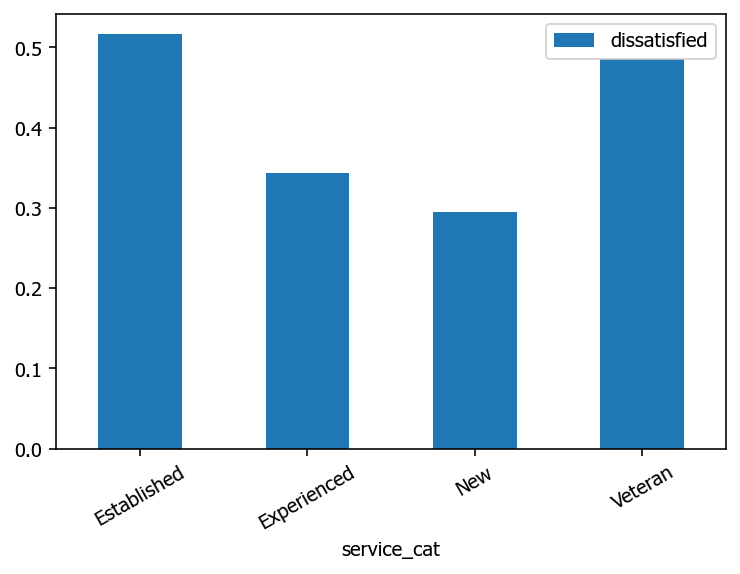

In [40]:
# Calculate the percentage of dissatisfied employees

dissatisfied_pct= combined_updated.pivot_table(index= 'service_cat', values= 'dissatisfied')

#Plot results
dissatisfied_pct.plot(kind= 'bar', rot= 30)
plt.show()

#### Observations:

The chart shows that the established service category has the highest percentage of dissatisfied employees i.e. employees that spent between 7 , followed by veteran, experienced, and new categories in descending order. This pattern suggests that employees in the established group may be facing more challenges or dissatisfaction compared to those in newer categories. 